In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.shape

(891, 12)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

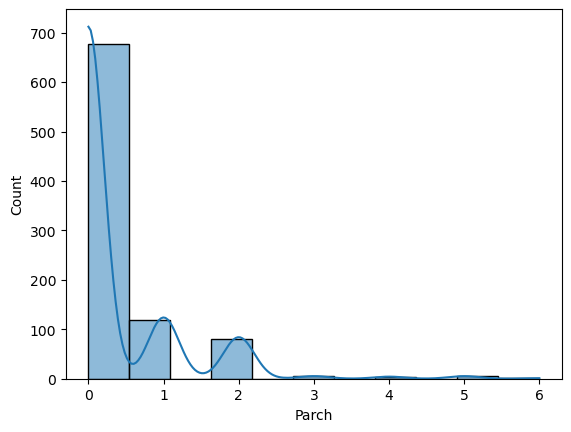

In [23]:
sns.histplot(df["Parch"],kde=True)
plt.show()

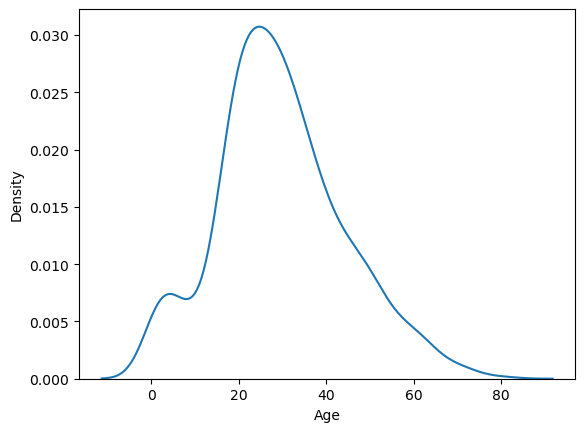

In [25]:
sns.distplot(df["Age"], hist=False)
plt.show()

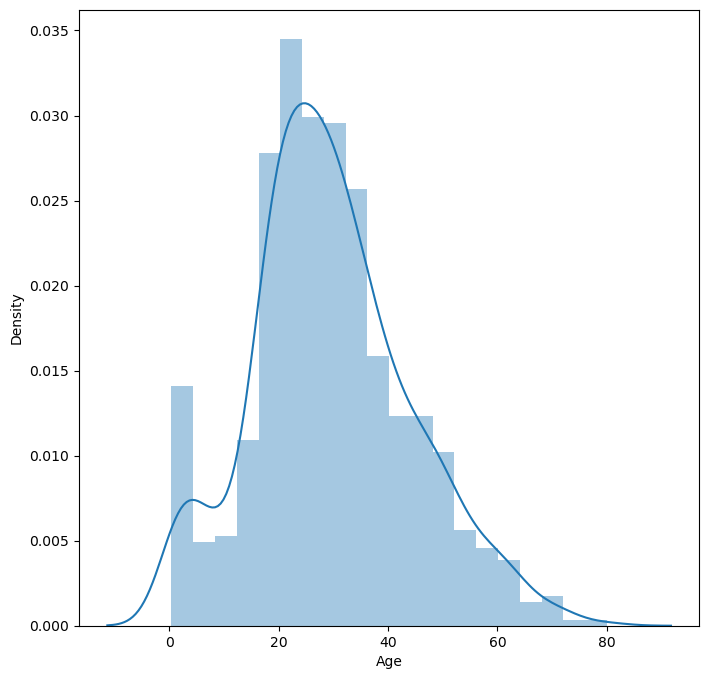

In [27]:
plt.figure(figsize=(8,8))
sns.distplot(df["Age"])
plt.show()

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

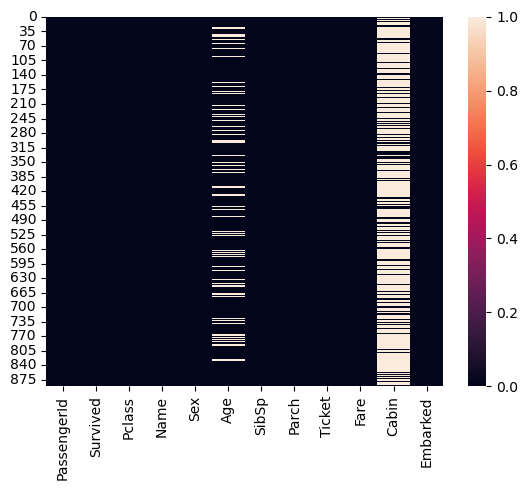

In [33]:
sns.heatmap(df.isnull())

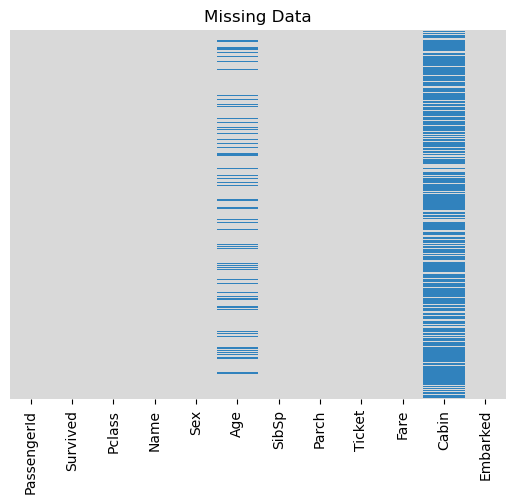

In [41]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="tab20c_r")
plt.title("Missing Data")
plt.show()

In [43]:
df["Age"].median()

28.0

In [45]:
df["Age"].mean()

29.69911764705882

<Axes: ylabel='Age'>

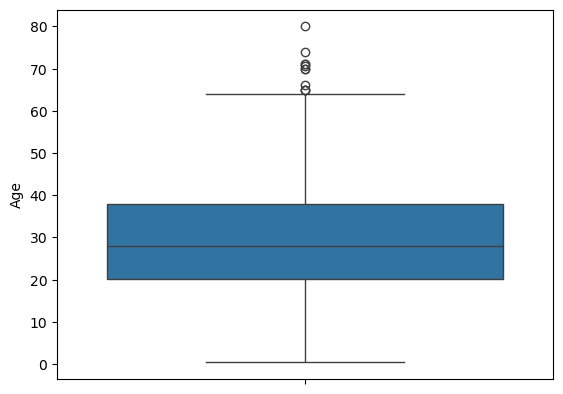

In [47]:
sns.boxplot(df["Age"])

In [49]:
Q1 = df["Age"].quantile(0.25)
Q2 = df["Age"].quantile(0.75)
IQR = Q2-Q1
IQR

17.875

In [57]:
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q2 + 1.5 *IQR
print(lower_bound)
print(upper_bound)

-6.6875
64.8125


In [59]:
df_filtered = df[(df["Age"]>=lower_bound) & (df["Age"]<= upper_bound)]
print(f"original rows: {df.shape[0]},filtere_rows: {df_filtered .shape[0]}")

original rows: 891,filtere_rows: 703


In [61]:
df_filtered.index

Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
       ...
       880, 881, 882, 883, 884, 885, 886, 887, 889, 890],
      dtype='int64', length=703)

In [63]:
df.index.isin(df_filtered.index)

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,

In [65]:
print(df[~df.index.isin(df_filtered.index)])

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

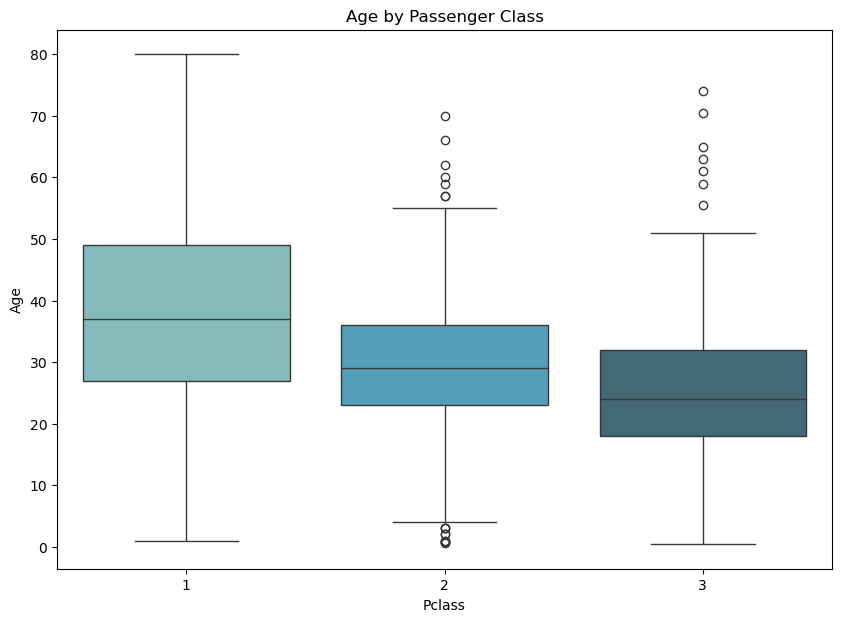

In [67]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "Pclass",y = "Age",data = df, palette = "GnBu_d").set_title("Age by Passenger Class")
plt.show()

In [75]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24
    else:
        return Age
         

In [77]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age, axis = 1)

In [79]:
df["Age"].isnull().sum()

0

<Axes: >

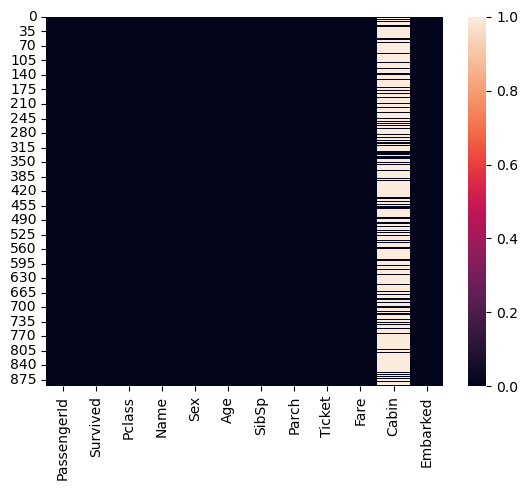

In [81]:
sns.heatmap(df.isnull())

In [85]:
df_filtered = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]
print(f" 0riginal rows:{df.shape[0]}, fileterd rows: {df_filtered.shape[0]}")

 0riginal rows:891, fileterd rows: 880


<Axes: ylabel='Age'>

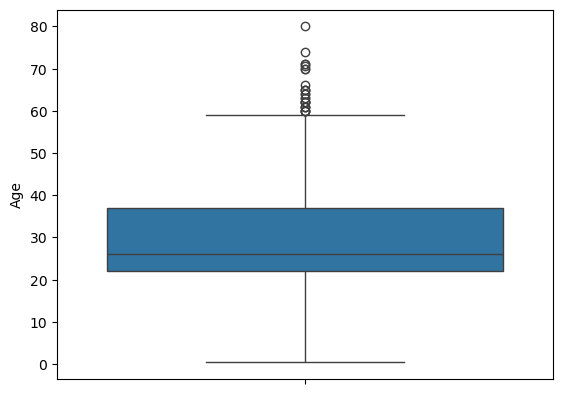

In [87]:
sns.boxplot(df["Age"])

In [89]:
df.drop("Cabin", axis = 1, inplace = True)

<Axes: >

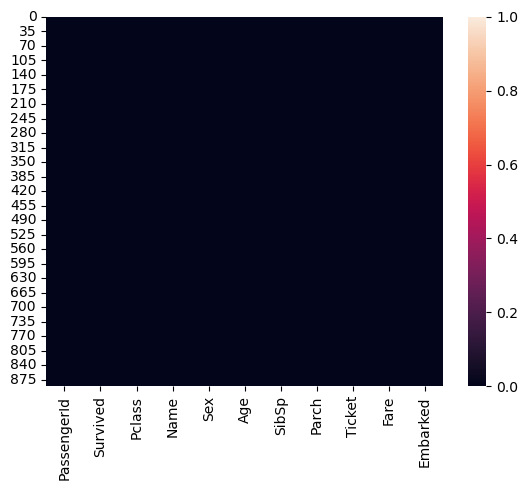

In [91]:
sns.heatmap(df.isnull())

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [97]:
df =df.dropna()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


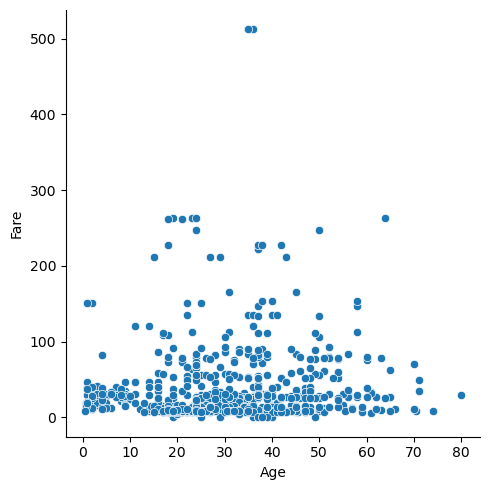

In [101]:
sns.relplot(x="Age" , y = "Fare", data=df)

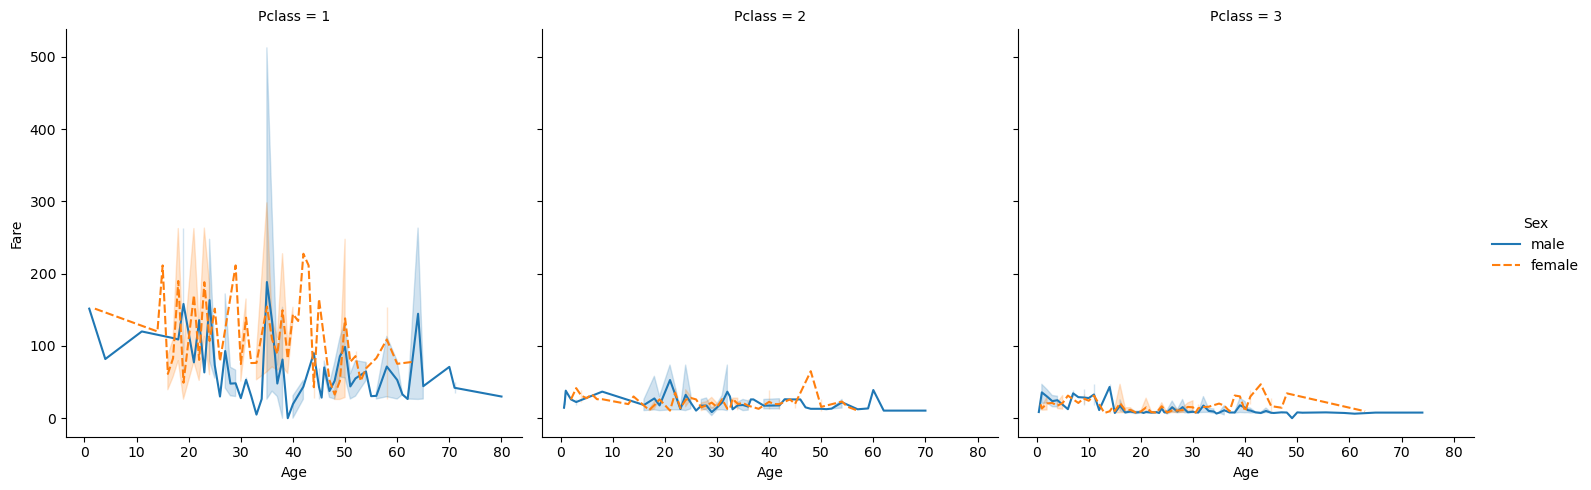

In [105]:
sns.relplot(x="Age" , y = "Fare", col = "Pclass", hue = "Sex", style ="Sex",kind = "line" ,data=df)
plt.show()

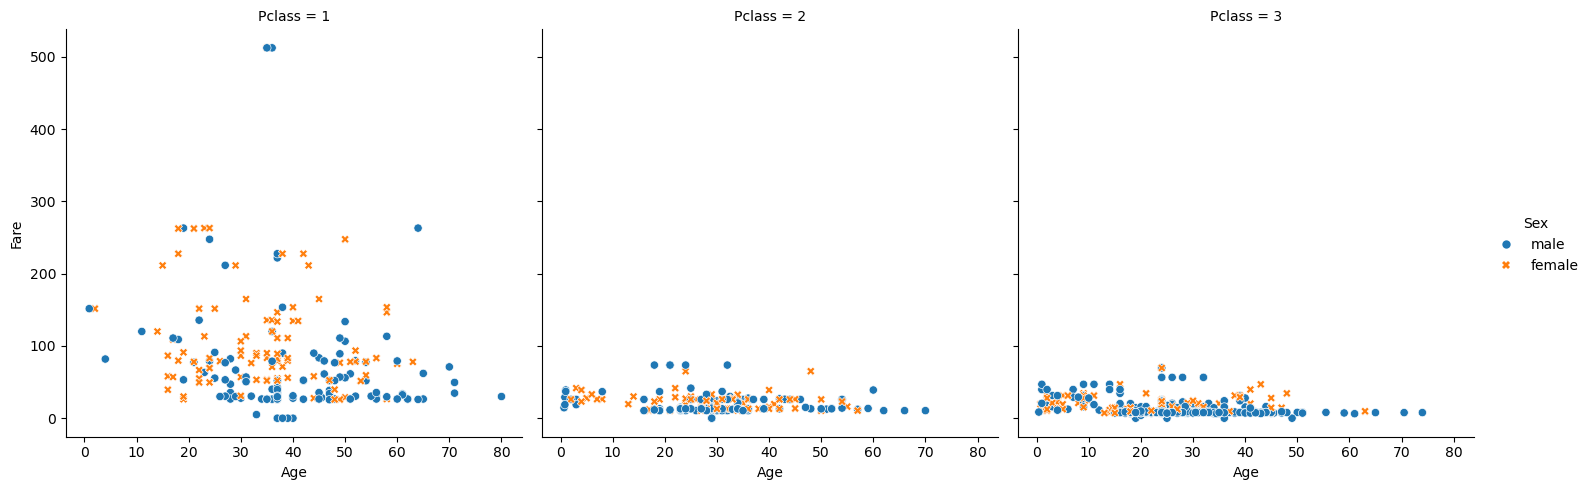

In [107]:
sns.relplot(x="Age" , y = "Fare", col = "Pclass", hue = "Sex", style ="Sex" ,data=df)
plt.show()

<Figure size 800x800 with 0 Axes>

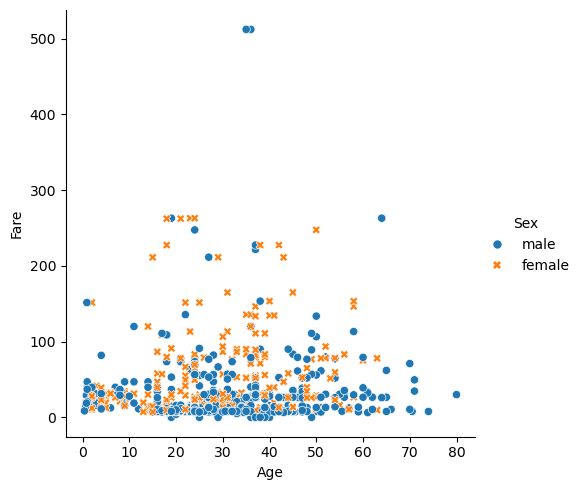

In [109]:
plt.figure(figsize =(8,8))
sns.relplot(x="Age" , y = "Fare", hue = "Sex", style ="Sex" ,data=df)
plt.show()

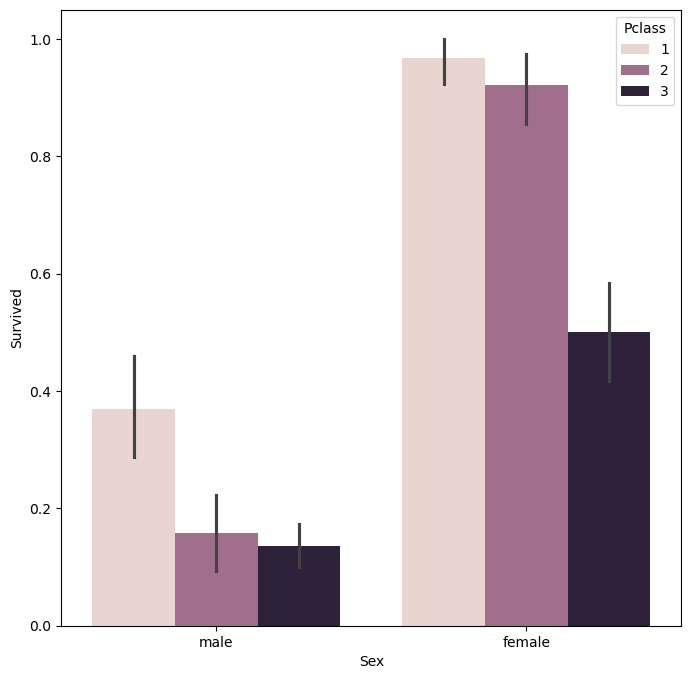

In [113]:
plt.figure(figsize =(8,8))
sns.barplot(x="Sex" , y = "Survived", hue = "Pclass" ,data=df)
plt.show()

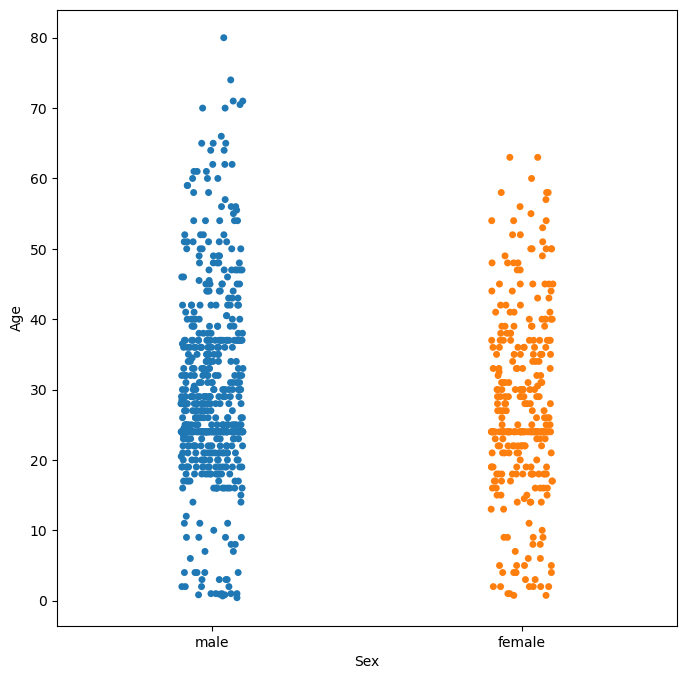

In [115]:
plt.figure(figsize =(8,8))
sns.stripplot(x="Sex" , y = "Age", hue = "Sex" ,data=df)
plt.show()

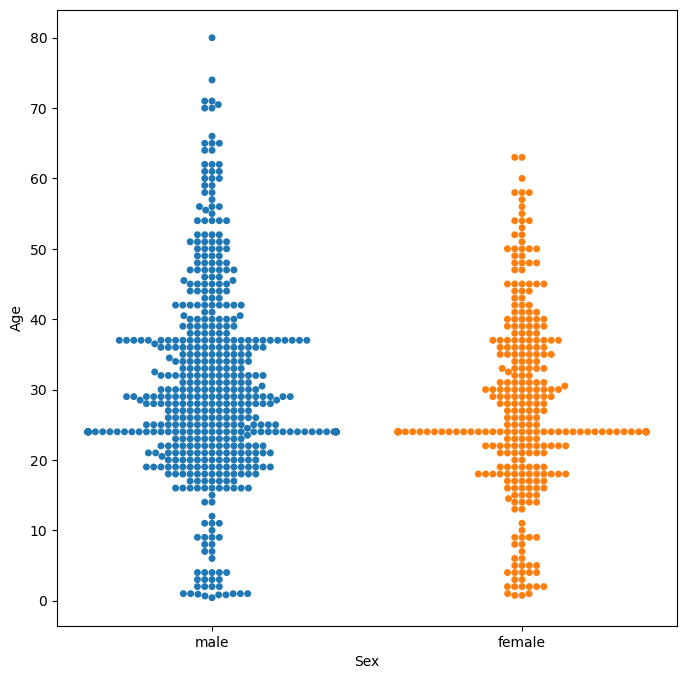

In [117]:
plt.figure(figsize =(8,8))
sns.swarmplot(x="Sex" , y = "Age", hue = "Sex" ,data=df)
plt.show()

In [ ]:
sns.violinplot